|  [National Science Data Fabric](https://nationalsciencedatafabric.org/) | [WIRED Global Center](https://resilience.utah.edu/) | [NASA Open Climate Workbench (OCW)](https://esto.nasa.gov/forums/estf2024/estf24Abstracts/lee.html)  |
|:---:|:---:|:---:|
|![nsdf](https://www.sci.utah.edu/~pascucci/public/NSDF-smaller.png) | ![NASA](https://upload.wikimedia.org/wikipedia/commons/e/e5/NASA_logo.svg) | ![wired](https://www.sci.utah.edu/~pascucci/public/wired-logo-small.png) |
|  |  created by [Valerio Pascucci](http://cedmav.org/)

|  [National Science Data Fabric](https://nationalsciencedatafabric.org/) | [WIRED Global Center](https://resilience.utah.edu/) | [NASA Open Climate Workbench (OCW)](https://esto.nasa.gov/forums/estf2024/estf24Abstracts/lee.html)  |
|:---:|:---:|:---:|
| ![nsdf](images/NSDF-smaller.png) | ![wired](images/wired-logo-small.png) |  ![NASA](images/NASA.png) |

### Access to the CMPI6 data {.unnumbered}
created by [Valerio Pascucci](http://cedmav.org/) 

#### Import the libraries needed: OpenVisus and numpy {.unnumbered}

In [13]:
import numpy as np
import os,sys

try:
  import OpenVisus as ov
except:
  sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
  import OpenVisus as ov

os.environ["VISUS_CACHE"]=os.environ.get("VISUS_CACHE","./.visus_cache")
print("VISUS_CACHE is ",os.environ["VISUS_CACHE"])
os.makedirs(os.environ["VISUS_CACHE"],exist_ok=True)

output_dir = ".output/"
os.makedirs(output_dir,exist_ok=True)

VISUS_CACHE is  ./.visus_cache


#### Create name of teh datset in variable **`dataset_name`**, open it as **`db`** and print its information.

In [14]:
# Set climate variables
model     = "ACCESS-CM2"
variable  = "huss" 
year      = 2020 # 2015 is the year whne the data switches from historical to simulated
scenario  = "ssp585"
dataset_name = f"{variable}_day_{model}_{scenario}_r1i1p1f1_gn"

# Open remote dataset to variable db
db = ov.LoadDataset(f"http://atlantis.sci.utah.edu/mod_visus?dataset={dataset_name}&cached=arco")
print("Url:", db.getUrl())
print("Field:", db.getFields())
fields=[db.getField(it) for it in db.getFields()]
for field in fields:
    dtype=field.dtype
    ranges=[dtype.getDTypeRange(I) for I in range(dtype.ncomponents())]
    ranges=[(r.From,r.To) if r.delta()>0 else (0,0) for r in ranges]
    print({
        "name":field.name,
        "dtype":  dtype.toString(),
        "default_compression":field.default_compression,
        "default_layout":field.default_layout,
        "default_value":field.default_value,
        "filter":field.filter,
        "dtype_ranges":ranges,
        })
print("Dimension:", db.getPointDim())
print("Timesteps availbale:", db.getTimesteps())

Url: http://atlantis.sci.utah.edu/mod_visus?dataset=huss%5Fday%5FACCESS%2DCM2%5Fssp585%5Fr1i1p1f1%5Fgn
Field: ['huss']
{'name': 'huss', 'dtype': 'float32', 'default_compression': 'zip', 'default_layout': '', 'default_value': 0, 'filter': '', 'dtype_ranges': [(0, 0)]}
Dimension: 2
Timesteps availbale: [735475, 735476, 735477, 735478, 735479, 735480, 735481, 735482, 735483, 735484, 735485, 735486, 735487, 735488, 735489, 735490, 735491, 735492, 735493, 735494, 735495, 735496, 735497, 735498, 735499, 735500, 735501, 735502, 735503, 735504, 735505, 735506, 735507, 735508, 735509, 735510, 735511, 735512, 735513, 735514, 735515, 735516, 735517, 735518, 735519, 735520, 735521, 735522, 735523, 735524, 735525, 735526, 735527, 735528, 735529, 735530, 735531, 735532, 735533, 735534, 735535, 735536, 735537, 735538, 735539, 735540, 735541, 735542, 735543, 735544, 735545, 735546, 735547, 735548, 735549, 735550, 735551, 735552, 735553, 735554, 735555, 735556, 735557, 735558, 735559, 735560, 735561, 7

In [15]:
# Set timestep to day corresponds to July 21. See https://nsidc.org/data/user-resources/help-center/day-year-doy-calendar
day_of_the_year = 202 
timestep =year*365 + day_of_the_year

# load the data into numpy array and print array infomration
data=db.read(time=timestep) #load anta in a numpy array
np.info(data) # print array information

class:  ndarray
shape:  (600, 1440)
strides:  (5760, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1af752df040
byteorder:  little
byteswap:  False
type: float32


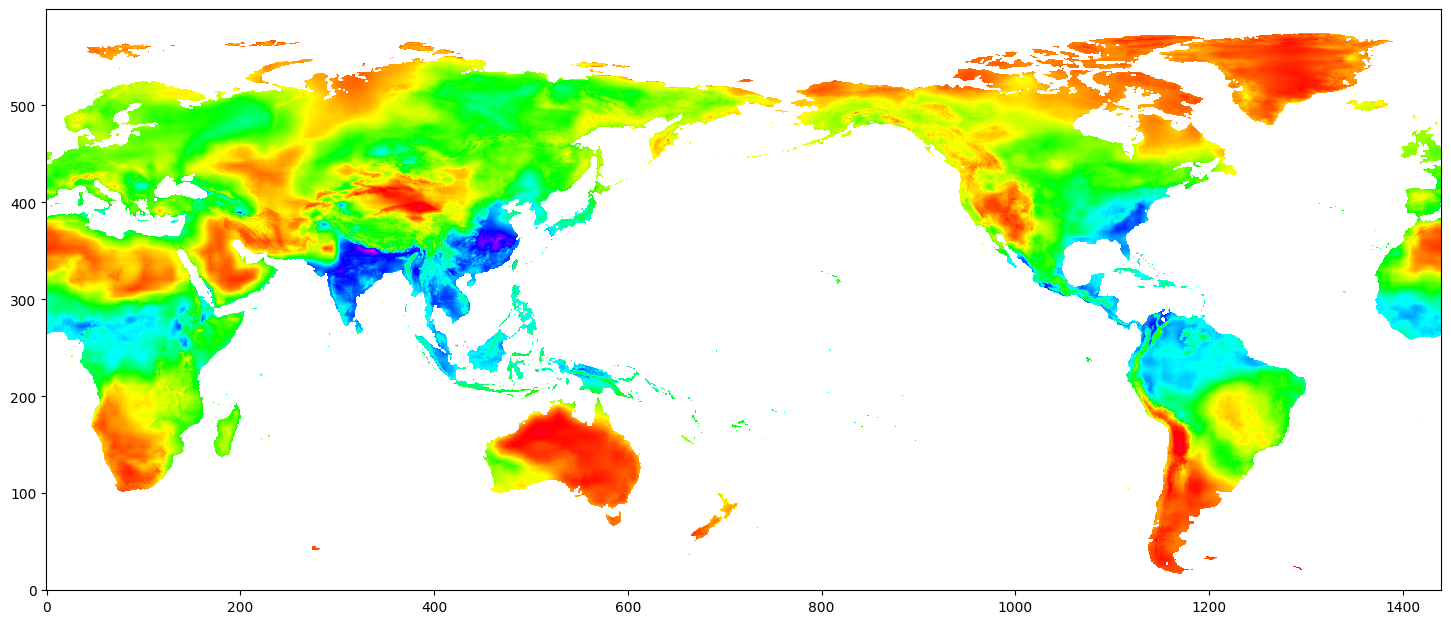

0.00077266403 0.033642013


In [16]:
import matplotlib.pyplot as plt
my_cmap = 'gist_rainbow'

plt.subplots(figsize=(18,9))
plt.imshow(data, cmap=my_cmap,origin='lower') # matplotlib puts the origin on the top left instead of bottom left
plt.savefig(os.path.join(output_dir,"cmip6_IDX_02_read_data.png"))
plt.show()
print(np.nanmin(data),np.nanmax(data))